<p align="center">
  <span style="color:Navy; font-size:200%; font-weight:bold; vertical-align:middle;">
    Temas Selectos: Python para Ciencias de la Tierra
  </span>
  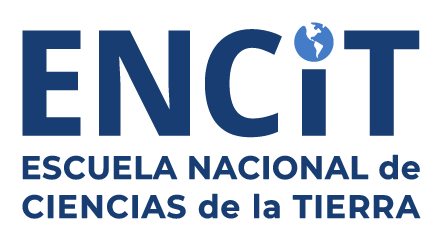
</p>
<p align="center" style="line-height:1.2;">
  <span style="color:RoyalBlue; font-size:160%;">Tema 3: MAn√°lisis Geoespacial de Datos</span><br/>
  <span style="color:DodgerBlue; font-size:140%;"> T√©cnicas de an√°lisis raster y vectorial </span><br/>
  <span style="font-size:100%;color:forestgreen"> Escuela Nacional de Ciencias de la Tierra  |  Semestre 2026-I</span>
</p>

---


# **<font color="ForestGreen"> Datos tipo raster </font>**

## **<font color="SeaGreen"> ¬øQu√© es un r√°ster? </font>**

> Los datos r√°ster o ‚Äúgridded‚Äù se almacenan como una cuadr√≠cula de valores que se representan en un mapa como p√≠xeles. Cada valor de p√≠xel representa un √°rea en la superficie de la Tierra.

Un archivo r√°ster est√° compuesto por una cuadr√≠cula regular de celdas, todas del mismo tama√±o.

Si has visto y utilizado r√°steres antes, probablemente haya sido al observar fotograf√≠as o im√°genes en herramientas como Google Earth. Sin embargo, los archivos r√°ster con los que trabajar√°s son diferentes de las fotograf√≠as, ya que est√°n georreferenciados. **Cada p√≠xel representa un √°rea de tierra en el suelo, y esa √°rea est√° definida por la resoluci√≥n espacial del r√°ster.**

* Cada celda se llama p√≠xel.
* Cada p√≠xel representa un √°rea en la superficie terrestre.
* La resoluci√≥n del r√°ster indica el √°rea que cada p√≠xel representa en el suelo. Por ejemplo, un r√°ster con una resoluci√≥n de 1 metro significa que cada p√≠xel representa un √°rea de 1 m √ó 1 m en el suelo si su CRS est√° en metros.
* Un conjunto de datos r√°ster puede tener atributos asociados. Por ejemplo, en un Modelo Digital de Elevaci√≥n (DEM), cada celda representa un valor de elevaci√≥n para esa ubicaci√≥n en la Tierra.

![ras](ras_vs_vec.png)


Algunas de las bibliotecas que m√°s se usan para trabajar con datos tipo r√°ste son las siguientes:

### Rasterio

- **rasterio**: Permite la lectura, escritura y manipulaci√≥n de datos r√°ster en formatos como GeoTIFF. Facilita la extracci√≥n de metadatos y la conversi√≥n de coordenadas espaciales.  

- **rioarray**: Extiende rasterio para trabajar con datos r√°ster como arreglos de NumPy o xarray, facilitando an√°lisis matriciales y operaciones en m√∫ltiples bandas.  

- **EarthPy**: Proporciona herramientas para manipulaci√≥n y visualizaci√≥n de datos geoespaciales, incluyendo funciones para procesar im√°genes satelitales y generar mapas con Matplotlib.

In [5]:
! pip install earthpy rasterio rioxarray cartopy

In [6]:
import os  # Manejo de archivos y directorios

# Manipulaci√≥n y visualizaci√≥n de datos
import numpy as np  # Operaciones num√©ricas y manejo de arreglos
import matplotlib.pyplot as plt  # Creaci√≥n de gr√°ficos
import seaborn as sns  # Visualizaci√≥n estad√≠stica avanzada

# An√°lisis geoespacial
import geopandas as gpd  # Manejo de datos vectoriales (shapefiles, ...)
import rasterio as rio  # Lectura y escritura de datos r√°ster
import rioxarray as rxr  # Extensi√≥n de rasterio para usar xarray con datos r√°ster

# Librer√≠a EarthPy para procesamiento y visualizaci√≥n geoespacial
import earthpy as et  # Funciones auxiliares para an√°lisis geoespacial
import earthpy.plot as ep  # Herramientas para visualizaci√≥n de datos espaciales

# Cartopy para visualizaci√≥n de mapas
import cartopy.crs as ccrs  # Sistemas de referencia de coordenadas
import cartopy.feature as cfeature  # Elementos cartogr√°ficos (fronteras, costas)
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter  # Formateo de ejes geogr√°ficos


Recuerda que la caracteristica principal de un RASTER es el contener informaci√≥n en **PIXELES**.

Dado que los pixeles pueden contener mucha informaci√≥n, un raster puede ser MUY PESADO. Para facilitar y mostrarte los elementos b√°sicos, usaremos datos pre-cargados (pero REALES) en la biblioteca de ***EarthPy***.

Los datos de [EarthPy](https://earthpy.readthedocs.io/en/latest/earthpy-data-subsets.html) incluyen multiples ejemplos de datos tanto de tipo Raster como Vectoriales.

Para el d√≠a de hoy usaremos datos GeoTIFF de la [inundaci√≥n de colorado en 2013](https://figshare.com/articles/dataset/Earth_Analytics_Python_Colorado_Flood_Teaching_Subset/6815945). Utilizando principalmente rasters:

- DSM (Digital Surface Model)
- DTM (Digital Terrain Model)
- Hillshade (Sombra de relieve)

Existen tanto antes como despues de la inundaci√≥n

In [1]:
import zipfile
import os

zip_path = '/home/jovyan/Unidad_3/Colorado_flood/colorado-flood.zip'  # Cambia esto por la ruta real
extract_to = '/home/jovyan/Unidad_3/Colorado_flood/'  # Carpeta donde se extraer√°n los archivos

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

### Abrir las imagenes
El parametro masked, es simplemente una eliminaci√≥n previa desde la lectura de aquellos valores nulos de pixel. Donde no exista clara evidencia de valores reales de los datos.

Ahora veamos el contenido de fondo de dicha imagen.

In [19]:
pre_dsm = rxr.open_rasterio("/home/jovyan/Unidad_3/Colorado_flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DSM.tif", masked=True)
pre_dtm = rxr.open_rasterio("/home/jovyan/Unidad_3/Colorado_flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif", masked=True)

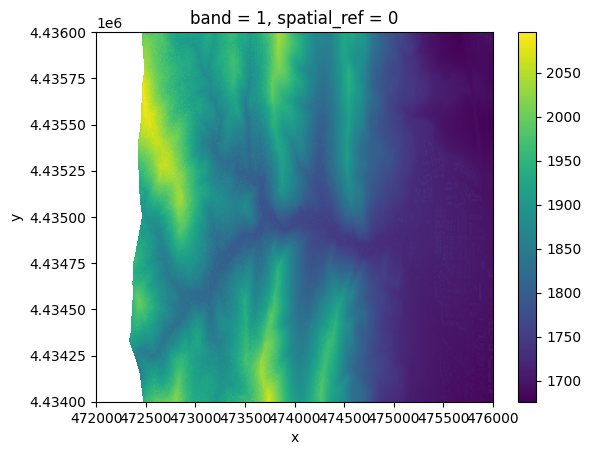

In [20]:
pre_dsm.plot()

In [21]:
pre_dsm

<xarray.DataArray (band: 1, y: 2000, x: 4000)> Size: 32MB
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 32kB 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

Como ves el contenido de la imagen ahora presenta un contenido n√∫merico leido y entendido a partir de los elementos del GeoTIFF, reconociendo a una estructura de datos similar a las que hemos trabajado previamente en Python.

## ELEMENTOS DEL RASTER

Verifiquemos pues los elementos que debes revisar previo a cualquier operaci√≥n con datos de este tipo:

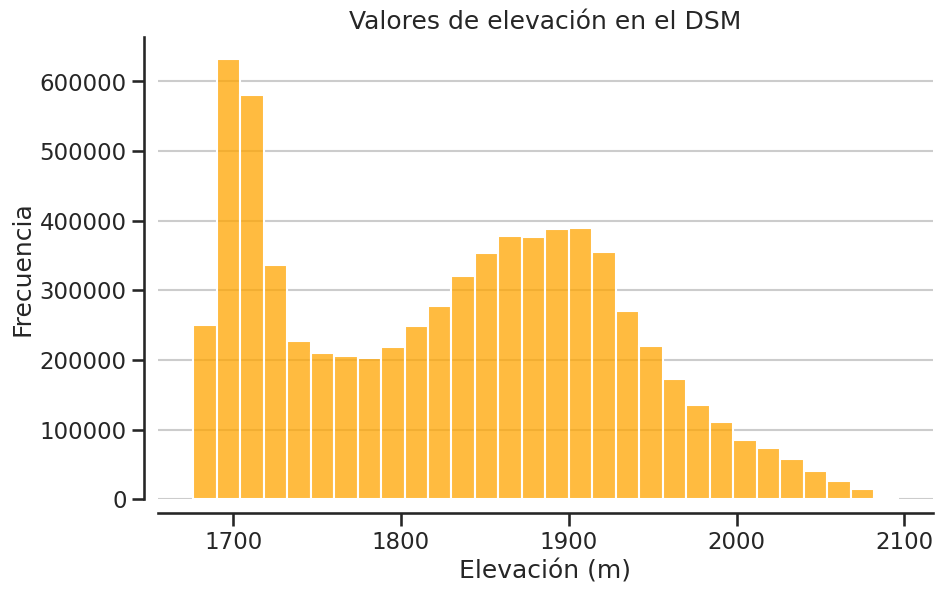

In [22]:
# Histograma

custom_params = {"axes.spines.right": True, "axes.spines.top": True, "axes.spines.left": True}
sns.set_theme(style='whitegrid', context="talk", rc=custom_params, color_codes=True)
sns.set_style("ticks")


# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar el histograma con Seaborn
sns.histplot(pre_dsm.values.flatten(),
             bins=30,
             color="orange",
             ax=ax)
sns.despine(offset=10)

# Personalizar etiquetas y t√≠tulo
ax.set(title="Valores de elevaci√≥n en el DSM",
       xlabel="Elevaci√≥n (m)",
       ylabel="Frecuencia")
ax.yaxis.grid(True)

# Mostrar la gr√°fica
plt.show()

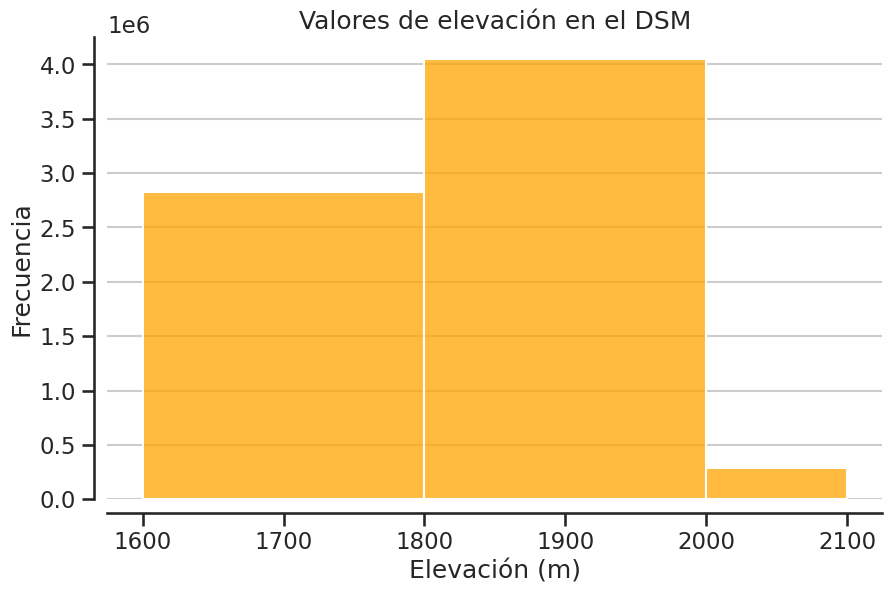

In [23]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))

custom_params = {"axes.spines.right": True, "axes.spines.top": True, "axes.spines.left": True}
sns.set_theme(style='whitegrid', context="talk", rc=custom_params, color_codes=True)
sns.set_style("ticks")


# Graficar el histograma con Seaborn
sns.histplot(pre_dsm.values.flatten(),
             bins=[1600, 1800, 2000, 2100],
             color="orange",
             ax=ax)

# Personalizar etiquetas y t√≠tulo
ax.set(title="Valores de elevaci√≥n en el DSM",
       xlabel="Elevaci√≥n (m)",
       ylabel="Frecuencia")

sns.despine(offset=10)
ax.yaxis.grid(True)

# Mostrar la gr√°fica
plt.show()

El codigo anterior es solo mostrar los histogramas y ver el conteo de frecuencia que existe de las elevaciones

### Ahora veamos la **metadata**

In [24]:
print("El sistema de referencia de coordenadas (CRS) de tus datos es:", pre_dsm.rio.crs)
print("El valor de no datos (nodatavalue) de tus datos es:", pre_dsm.rio.nodata)
print("La forma (dimensiones) de tus datos es:", pre_dsm.shape)
print("La resoluci√≥n espacial de tus datos es:", pre_dsm.rio.resolution())

El sistema de referencia de coordenadas (CRS) de tus datos es: EPSG:32613
El valor de no datos (nodatavalue) de tus datos es: nan
La forma (dimensiones) de tus datos es: (1, 2000, 4000)
La resoluci√≥n espacial de tus datos es: (1.0, -1.0)


---
<a name='ej-1'></a>
### **<font color="DodgerBlue"> Ejercicio 1:  </font>**
<font color="DarkBlue"> 1. Con esto podemos conocer la informaci√≥n previa. Ahora revisa estas caracteristicas **histograma y metadata** pero para el DTM.

---

# HAGAMOS ALGUNAS OPERACIONES:

- Operaciones matematicas con los datos de raster (Canopy Height Model)
- Clasificaci√≥n dentro del Raster y visualizaci√≥n
- Reproyecci√≥n del raster

### Modelo de Altura del Copa (CHM)
El Modelo de Altura del Copa (CHM) representa la altura de los √°rboles. No es un valor de elevaci√≥n, sino la diferencia entre el suelo y la parte superior de los √°rboles (o edificios, si no se han eliminado del DSM).

### Calcular la Diferencia Entre Dos R√°steres
Una forma sencilla de calcular un CHM es restando el DEM del DSM:

DSM ‚àí DEM = CHM


Esto nos da la diferencia entre la parte superior de la superficie terrestre y el suelo, es decir, la altura de los √°rboles (y edificios, si no se han limpiado los datos).

### Modelo de Altura del Copa (CHM)
El Modelo de Altura del Copa (CHM) representa la altura de los √°rboles. No es un valor de elevaci√≥n, sino la diferencia entre el suelo y la parte superior de los √°rboles (o edificios, si no se han eliminado del DSM).

### Calcular la Diferencia Entre Dos R√°steres
Una forma sencilla de calcular un CHM es restando el DEM del DSM:

DSM ‚àí DEM = CHM


Esto nos da la diferencia entre la parte superior de la superficie terrestre y el suelo, es decir, la altura de los √°rboles (y edificios, si no se han limpiado los datos).

In [25]:
# ¬øLos l√≠mites espaciales son los mismos?
print("¬øLa extensi√≥n espacial es la misma?",
      pre_dsm.rio.bounds() == pre_dtm.rio.bounds())

# ¬øLa resoluci√≥n es la misma?
print("¬øLa resoluci√≥n es la misma?",
      pre_dsm.rio.resolution() == pre_dtm.rio.resolution())

¬øLa extensi√≥n espacial es la misma? True
¬øLa resoluci√≥n es la misma? True


In [26]:
# Calcular el Modelo de Altura del Dosel (CHM)
lidar_chm_xr = pre_dsm - pre_dtm

lidar_chm_xr

<xarray.DataArray (band: 1, y: 2000, x: 4000)> Size: 32MB
array([[[       nan,        nan,        nan, ..., 0.        ,
         0.17004395, 0.960083  ],
        [       nan,        nan,        nan, ..., 0.        ,
         0.09008789, 1.6400146 ],
        [       nan,        nan,        nan, ..., 0.        ,
         0.        , 0.07995605],
        ...,
        [       nan,        nan,        nan, ..., 0.        ,
         0.        , 0.        ],
        [       nan,        nan,        nan, ..., 0.        ,
         0.        , 0.        ],
        [       nan,        nan,        nan, ..., 0.        ,
         0.        , 0.        ]]], dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 32kB 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int64 8B 0

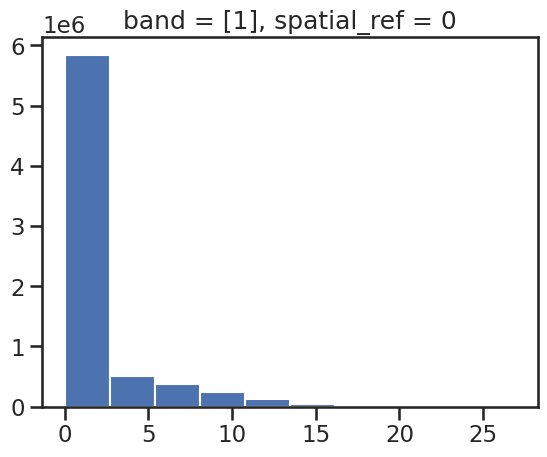

In [27]:
lidar_chm_xr.plot.hist()
plt.show()

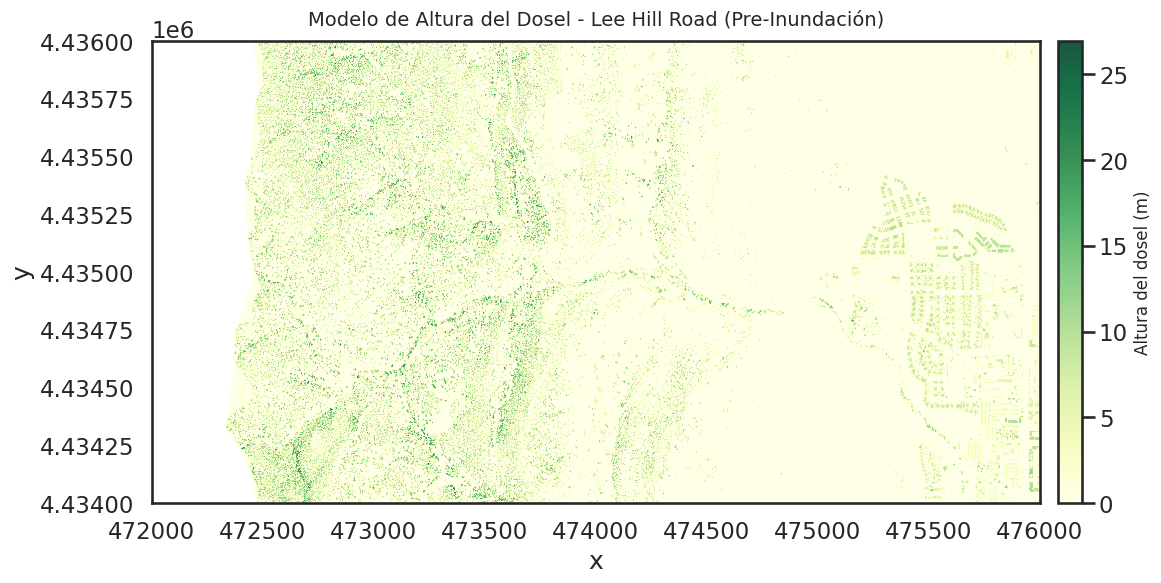

In [28]:
# Configurar estilos de visualizaci√≥n
sns.set_style("white")
plt.rcParams.update({"font.size": 12})

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar el CHM con una mejor escala de colores y barra de color ajustada
im = lidar_chm_xr.plot(ax=ax, cmap="YlGn", alpha=0.9, add_colorbar=False)

# Agregar una barra de color personalizada
cbar = plt.colorbar(im, ax=ax, fraction=0.025, pad=0.02)
cbar.set_label("Altura del dosel (m)", fontsize=12)

# Mejorar la presentaci√≥n del mapa
ax.set_title("Modelo de Altura del Dosel - Lee Hill Road (Pre-Inundaci√≥n)", fontsize=14, pad=12)

plt.show()

## Clasificaci√≥n dentro del Raster y visualizaci√≥n

En ese r√°ster, cada p√≠xel se asigna a un nuevo valor seg√∫n un determinado enfoque. Este enfoque puede variar dependiendo de la pregunta cient√≠fica que se quiera responder.

### **Explorar Histogramas de R√°ster**  
Explora m√°s a fondo tu histograma ajustando los l√≠mites del eje **X** y **Y** con los par√°metros `xlim` y `ylim`.  

Estos par√°metros permiten hacer un **zoom visual** en los datos del gr√°fico, pero **no modifican** los valores originales del dataset.

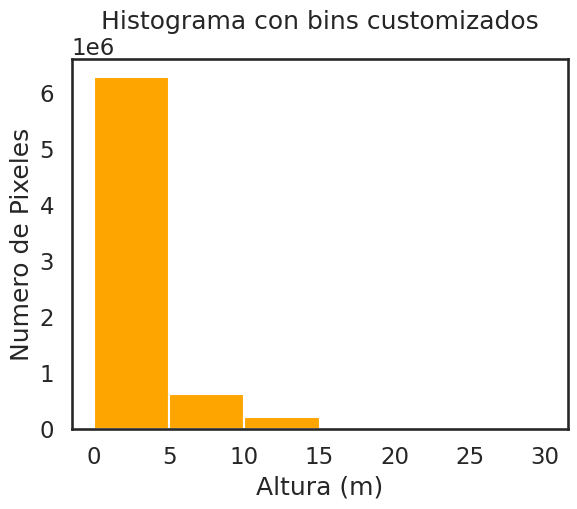

In [29]:
# Histogram with custom breaks
f, ax = plt.subplots()
lidar_chm_xr.plot.hist(color="orange",
                        bins=[0, 5, 10, 15, 20, 30])
ax.set(title="Histograma con bins customizados",
       xlabel="Altura (m)",
       ylabel="Numero de Pixeles")

plt.show()

Es posible que desees ajustar la distribuci√≥n de los intervalos (**bins**) del histograma. En el gr√°fico actual, parece que hay muchos valores cercanos a **0**.  

En el caso de este instrumento LiDAR, se sabe que los valores entre **0 y 2 metros** no son confiables (seg√∫n la documentaci√≥n del sensor NEON y el procesamiento de estos datos).  

### **Clasificaci√≥n propuesta de altura de √°rboles:**  
‚úÖ **0 - 2 m** ‚Üí **Sin √°rboles** (datos no confiables)  
‚úÖ **2 - 7 m** ‚Üí **√Årboles bajos**  
‚úÖ **7 - 12 m** ‚Üí **√Årboles medianos**  
‚úÖ **> 12 m** ‚Üí **√Årboles altos**  

A continuaci√≥n, puedes experimentar con estos intervalos para visualizar mejor la distribuci√≥n de alturas en tu dataset. üå≥

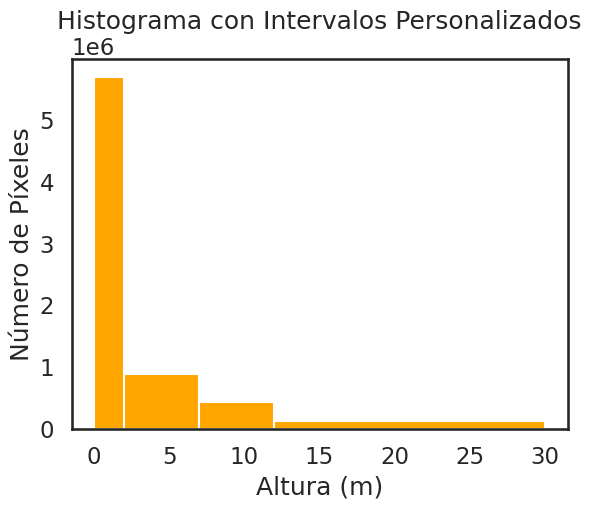

In [30]:
# Histograma con intervalos personalizados
f, ax = plt.subplots()

lidar_chm_xr.plot.hist(
    color='orange',
    bins=[0, 2, 7, 12, 30])
ax.set(title="Histograma con Intervalos Personalizados",
       xlabel="Altura (m)",
       ylabel="N√∫mero de P√≠xeles")

plt.show()

### **Mapear los valores del r√°ster a nuevos valores (Reclasificaci√≥n del R√°ster)**  
Para reclasificar tu r√°ster, primero necesitas crear una **matriz de reclasificaci√≥n**.  

Esta matriz **mapea** un rango de valores a un nuevo valor definido. Utilizar√°s esta matriz para crear un modelo de altura del dosel clasificado, donde designar√°s **√°rboles bajos**, **medios** y **altos**.  

Los nuevos valores definidos ser√°n los siguientes:

- **Sin √°rboles**: (0m - 2m de altura) = **NA**  
- **√Årboles bajos**: (2m - 7m de altura) = **1**  
- **√Årboles medianos**: (7m - 12m de altura) = **2**  
- **√Årboles altos**: (> 12m de altura) = **3**  

### **Observaciones**:  
1. En la lista anterior, configuraste las celdas con un valor entre **0 y 2 metros** como **NA** o valor **nodatavalue**. Esto significa que est√°s asumiendo que no hay √°rboles en esas ubicaciones.  
2. En la matriz de reclasificaci√≥n, se utiliza **Inf** para representar el valor m√°s grande o el valor m√°ximo encontrado en el r√°ster. Entonces, la asignaci√≥n ser√≠a la siguiente:

| **Rango de altura (m)** | **Valor reclasificado** |
|-------------------------|-------------------------|
| 0 - 2                   | NA (Sin √°rboles)        |
| 2 - 7                   | 1 (√Årboles bajos)       |
| 7 - 12                  | 2 (√Årboles medianos)    |
| > 12 o 12 - Inf          | 3 (√Årboles altos)       |


In [31]:
lidar_chm_xr.rio.nodata

In [32]:
data_min_value = np.nanmin(lidar_chm_xr)
data_max_value = np.nanmax(lidar_chm_xr)
print(data_min_value, data_max_value)

0.0 26.930054


In [33]:
class_bins = [-np.inf, 2, 7, 12, np.inf]
class_bins

[-inf, 2, 7, 12, inf]

In [34]:
# Clasificaci√≥n de datos usando xarray
import xarray as xr
pre_lidar_chm_class = xr.apply_ufunc(np.digitize,
                                     lidar_chm_xr,
                                     class_bins)

In [35]:
pre_lidar_chm_class

<xarray.DataArray (band: 1, y: 2000, x: 4000)> Size: 64MB
array([[[5, 5, 5, ..., 1, 1, 1],
        [5, 5, 5, ..., 1, 1, 1],
        [5, 5, 5, ..., 1, 1, 1],
        ...,
        [5, 5, 5, ..., 1, 1, 1],
        [5, 5, 5, ..., 1, 1, 1],
        [5, 5, 5, ..., 1, 1, 1]]])
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 32kB 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int64 8B 0

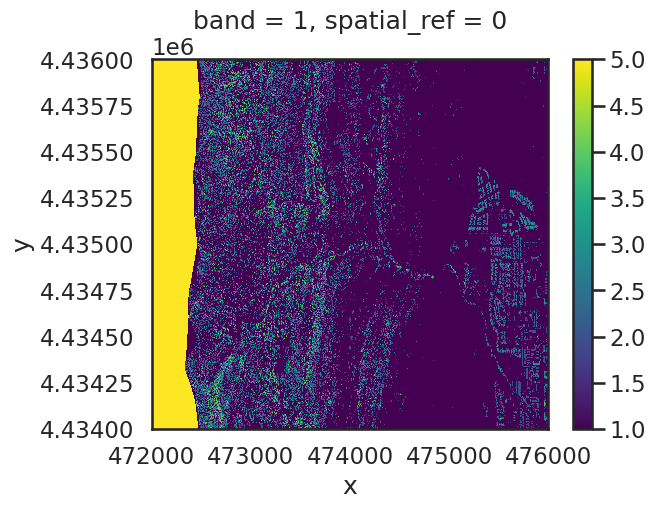

In [36]:
im = pre_lidar_chm_class.plot()
ax.set_axis_off()

In [37]:
# Enmasacarando valores igual 5 que representan valores nulos
pre_lidar_chm_class_ma = pre_lidar_chm_class.where(pre_lidar_chm_class != 5)
pre_lidar_chm_class_ma

<xarray.DataArray (band: 1, y: 2000, x: 4000)> Size: 64MB
array([[[nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        ...,
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.]]])
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 32kB 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int64 8B 0

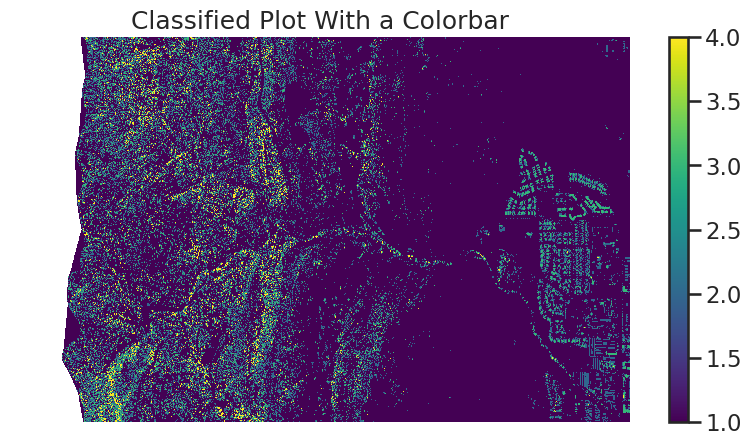

In [38]:
# Graficando valores enmascarados
f, ax = plt.subplots(figsize=(10,5))
pre_lidar_chm_class_ma.plot()
ax.set(title="Classified Plot With a Colorbar")

ax.set_axis_off()

plt.show()

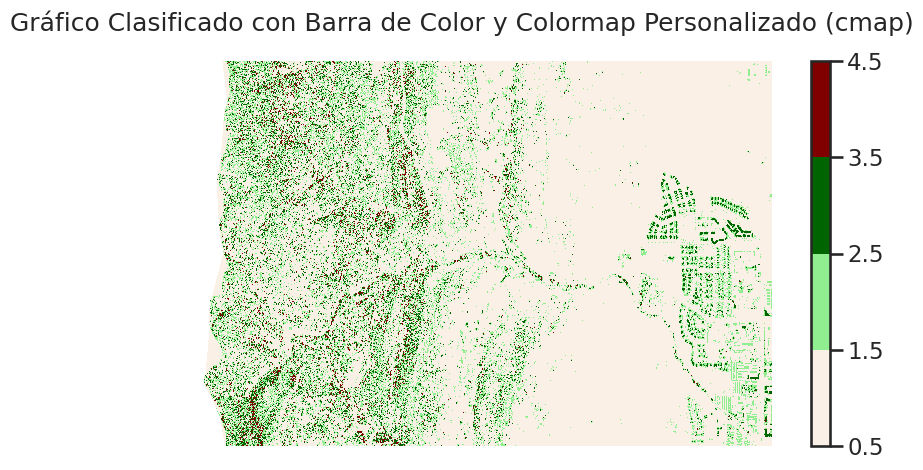

In [39]:
from matplotlib.colors import ListedColormap, BoundaryNorm


# Graficar los datos usando colores m√°s agradables
colors = ['linen', 'lightgreen', 'darkgreen', 'maroon']
class_bins = [.5, 1.5, 2.5, 3.5, 4.5]
cmap = ListedColormap(colors)
norm = BoundaryNorm(class_bins,
                    len(colors))

# Graficar el r√°ster reci√©n clasificado y enmascarado
f, ax = plt.subplots(figsize=(10, 5))
pre_lidar_chm_class_ma.plot(cmap=cmap,
                                   norm=norm)
ax.set(title="Gr√°fico Clasificado con Barra de Color y Colormap Personalizado (cmap)")
ax.set_axis_off()
plt.show()


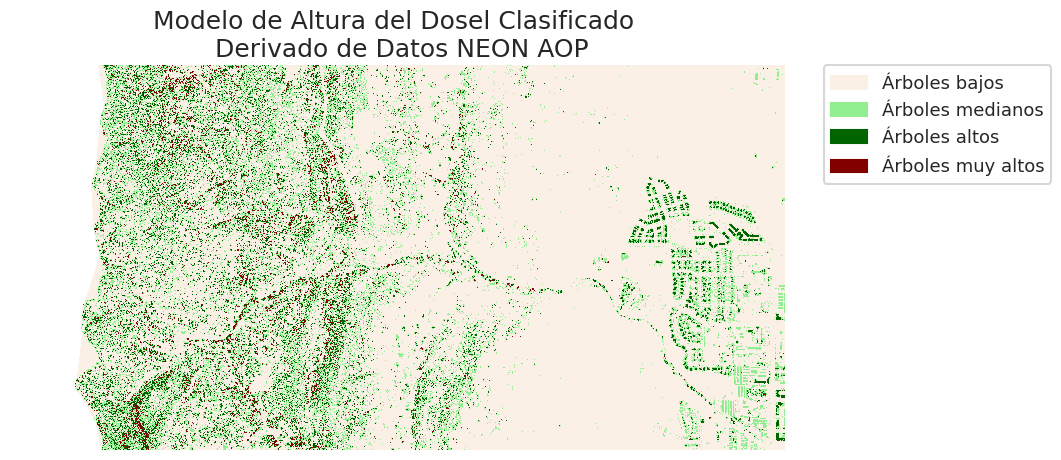

In [40]:
# Crear una lista de etiquetas para la leyenda
etiquetas_altura = ["√Årboles bajos",
                    "√Årboles medianos",
                    "√Årboles altos",
                    "√Årboles muy altos"]

# Crear un colormap a partir de una lista de colores
colores = ['linen', 'lightgreen', 'darkgreen', 'maroon']
cmap = ListedColormap(colores)

# Definir los l√≠mites de las clases para la reclasificaci√≥n
class_bins = [.5, 1.5, 2.5, 3.5, 4.5]
norm = BoundaryNorm(class_bins, len(colores))

# Graficar el r√°ster reci√©n clasificado y enmascarado
f, ax = plt.subplots(figsize=(10, 5))

# Im√°genes del r√°ster
im = pre_lidar_chm_class_ma.squeeze().plot.imshow(cmap=cmap, norm=norm, add_colorbar=False)

# Asegurarse de que la imagen est√© correctamente renderizada
ax.set(title="Modelo de Altura del Dosel Clasificado \n Derivado de Datos NEON AOP")
ax.set_axis_off()

# Agregar la leyenda utilizando EarthPy
# Ahora pasamos el objeto de imagen correctamente a draw_legend
ep.draw_legend(im, titles=etiquetas_altura)

# Mostrar la gr√°fica
plt.show()


---
<a name='ej-1'></a>
### **<font color="DodgerBlue"> Ejercicio 2: Replica el an√°lisis que hicimos ahora con los datos post-inundaci√≥n  </font>**
<font color="DarkBlue"> 1. Carga y grafica los archivos DSM y DTM.

<font color="DarkBlue"> 2. Obten√©n los histogramas de DSM y DTM post inundaci√≥n

<font color="DarkBlue"> 3. Obt√©n el Modelo de Altura del Copa (CHM) post inundaci√≥n.

¬øHubo alguna diferencia?

